In [1]:
#Sequential Graph
#Here we will create multiple Nodes to sequentially process and update different parts of the state graph 
from typing import TypedDict
from langgraph.graph import StateGraph

In [3]:
class AgentState(TypedDict):
    name : str
    age : str
    final : str

In [10]:
def first_node(state: AgentState) -> AgentState:
    """This is the first Node"""
    state['final'] = f"Hello there, {state['name']}"
    return state

def second_node(state: AgentState) -> AgentState:
    """This is the second Node"""
    state['final'] = state['final'] + f" you are {state['age']} years old"
    return state

In [11]:
graph=StateGraph(AgentState)
graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)
graph.set_entry_point("first_node")
graph.set_finish_point("second_node")

graph.add_edge("first_node","second_node")#this adds a connection between the two nodes that we want to work between
app=graph.compile()


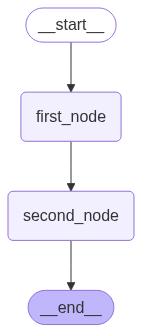

In [12]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
result = app.invoke({"name":"rohan","age":"23"})
print(result)
print(result['final'])

{'name': 'rohan', 'age': '23', 'final': 'Hello there, rohan you are 23 years old'}
Hello there, rohan you are 23 years old


Exercise-3: make 3 nodes , take the name age and skills as a list 
First node => initialize the name 
second node => add the age 
third node => add the skills
The final output should be a combined message 


In [29]:
class AgentSkillNode(TypedDict):
    name : str
    age : str
    skills : list[str]
    result : str

def node1 (state:AgentSkillNode) ->AgentSkillNode:
    """agent1"""
    state['result'] = f"{state['name']}, welcome to the system! "
    return state
    
def node2 (state:AgentSkillNode) ->AgentSkillNode:
    """agent2"""
    state['result'] = state['result']+f"You are {state['age']} years old! "
    return state

def node3 (state:AgentSkillNode) ->AgentSkillNode:
    """agent3"""
    state['result'] = state['result']+f"you have skills in : " + ", ".join(str(x) for x in state["skills"])
    return state


graph=StateGraph(AgentSkillNode)
graph.add_node("node1",node1)
graph.add_node("node2",node2)
graph.add_node("node3",node3)
graph.add_edge("node1","node2")
graph.add_edge("node2","node3")
graph.set_entry_point("node1")
graph.set_finish_point("node3")
app=graph.compile()

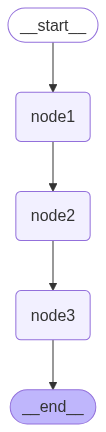

In [30]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
ans = app.invoke({"name":"rohan","age":"23","skills":["Python","Machine Learning","LangGraph"]})

print(ans['result'])

rohan, welcome to the system! You are 23 years old! you have skills in : Python, Machine Learning, LangGraph
